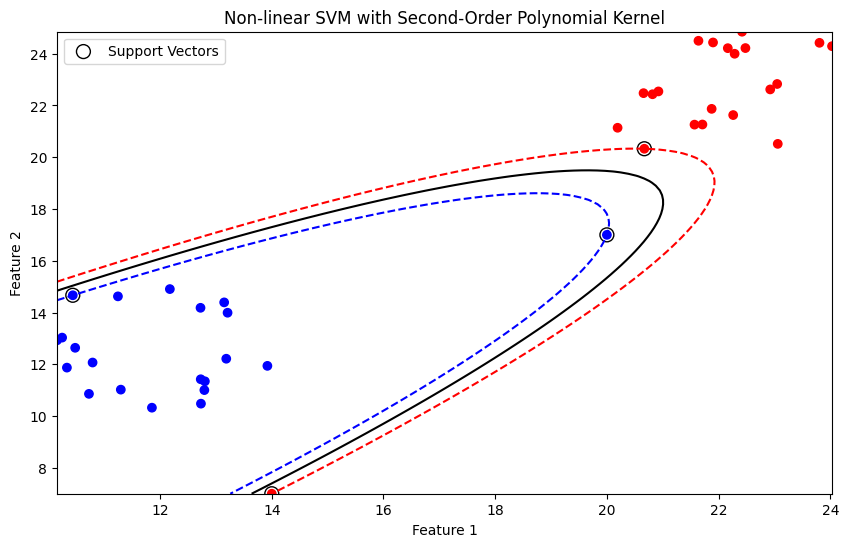

For the given 2D data, the number of support vectors for Class 1 (recoded class label +1) is 2
And for Class 2 (recoded class label -1) is 2


In [10]:
# %% [markdown]
# # Non-linear support vector machine
# %%
# Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data
data = pd.read_csv('C:\\12.LUT\\00.Termic Cources\\2.pattern recognition\\jalase5\\Code\\Excersitse class\\t030.csv', header=None)
X = data[[0, 1]].values
y = data[2].values
y = np.where(y == 1, 1, -1)  # Ensure labels are +1 and -1

# Polynomial kernel function (second-order)
def kernel_poly2(x1, x2):
    return (np.dot(x1, x2) + 1) ** 2

# Number of data points
n_samples, n_features = X.shape

# Initialize parameters for quadratic programming
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = kernel_poly2(X[i], X[j])

P = cvxopt_matrix(np.outer(y, y) * K)
q = cvxopt_matrix(-np.ones(n_samples))

G = cvxopt_matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
h = cvxopt_matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * 1)))  # C = 1 (Penalization)

A = cvxopt_matrix(y.astype(float), (1, n_samples))
b = cvxopt_matrix(0.0)

# Set solver parameters
cvxopt_solvers.options['show_progress'] = False

# Solve QP problem
solution = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Support vectors have non zero lagrange multipliers
sv = alphas > 1e-5
ind = np.arange(len(alphas))[sv]
alphas_sv = alphas[sv]
sv_X = X[sv]
sv_y = y[sv]

# Calculate the bias term w0
w0 = np.mean([sv_y[i] - np.sum(alphas_sv * sv_y * K[ind[i], sv])
              for i in range(len(alphas_sv))])

# Define decision function
def decision_function(X):
    return (np.sum(alphas_sv * sv_y * np.array([kernel_poly2(sv_X[i], X) for i in range(len(sv_X))]), axis=0) + w0)

# Predict class labels
def predict(X):
    return np.sign(decision_function(X))

# Plotting the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')

# Create grid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Evaluate decision function on the grid
Z = np.array([decision_function(np.array([x, y])) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(sv_X[:, 0], sv_X[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("Non-linear SVM with Second-Order Polynomial Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
# Print the number of support vectors for Class 1 (+1) and Class 2 (-1)
num_sv_class_1 = np.sum(sv_y == 1)
num_sv_class_2 = np.sum(sv_y == -1)

print(f'For the given 2D data, the number of support vectors for Class 1 (recoded class label +1) is {num_sv_class_1}')
print(f'And for Class 2 (recoded class label -1) is {num_sv_class_2}')